# Faces

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import torch.nn as nn
import torch
from torchvision import datasets, transforms, io

# Create data for training

In [2]:
from torch.utils.data import DataLoader 
from data_manipulation.faces import FacesDataset

data_dir = 'data/img_align_celeba/img_align_celeba/'
dataset = FacesDataset(data_dir)
dataloader = DataLoader(dataset, batch_size=10)

2023-10-18 23:29:50.348723: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

dataset = datasets.ImageFolder(root="data/img_align_celeba/", transform=transform)

transform = transforms.Compose([transforms.Resize((128,128)),
                                transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])
test_image = io.read_image("data/img_align_celeba/img_align_celeba/000001.jpg")
print(test_image.shape)
new_image = transform(test_image)
print(new_image.shape)
plt.imshow(new_image.permute((1,2,0)))

# Define Components

## Optimizers and loss functions

In [47]:
from models.faces import FaceGenerator,FaceDiscriminator

input_length = 100

generator = FaceGenerator(input_length)
discriminator = FaceDiscriminator()
generator_loss = nn.BCELoss()
discriminator_loss = nn.BCELoss()
generator_optimizer = torch.optim.Adam(generator.parameters(), lr=0.001)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.001)

### Generator & Discriminator

In [ ]:
generator = FaceGenerator(input_length)
generator_loss = nn.BCELoss()
generator_optimizer = torch.optim.Adam(generator.parameters(), lr=0.001)

# Train GAN

In [ ]:
from trainers.general_trainer import Trainer
trainer = Trainer(generator, discriminator, generator_loss, discriminator_loss, generator_optimizer, discriminator_optimizer)
trainer.train(dataloader, input_length)

torch.Size([1, 100])


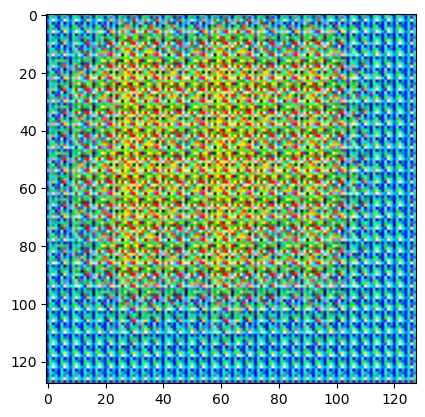

In [27]:
noise = torch.tensor(np.random.normal(0, 1, (1,100)), dtype=torch.float)
generator = torch.load("saved_models/generator_300.pth")

generator.eval()

with torch.no_grad():
    fake_image = generator(noise)

new_image = fake_image[0].detach()
new_image = (new_image + 1)/2
plt.imshow(new_image.permute((1,2,0)))
plt.show()

In [23]:
batch_size = 16
image_height = 128
image_width = 128
num_channels = 3

# Generate random input data
random_input = torch.randn(batch_size, num_channels, image_height, image_width)

# Print the shape of the random input data
print(random_input.shape)


torch.Size([16, 3, 128, 128])


In [ ]:
noise = torch.tensor(np.random.normal(0, 1, (4, 10)), dtype=torch.float)
print(noise.size(0))

torch.Size([6, 100])


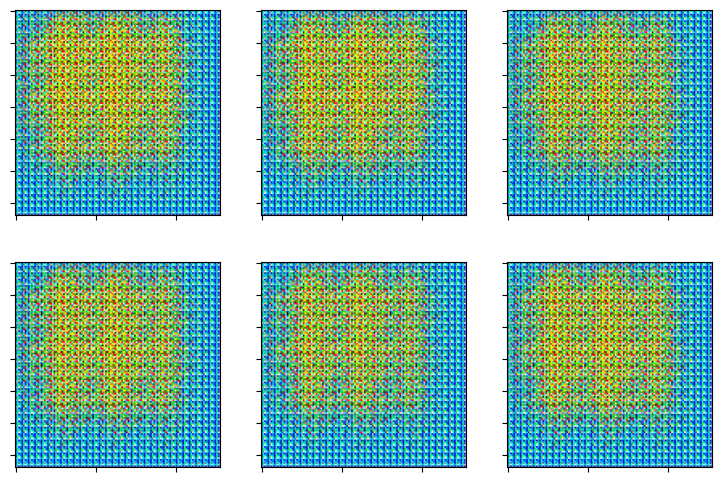

In [46]:

seed = 1234
n_iteration = 300

n_rows = 2
n_cols = 3
scale = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*scale, n_rows*scale))


np.random.seed(seed)
noise = torch.tensor(np.random.normal(0, 1, (n_rows*n_cols, input_length)), dtype=torch.float)


generator = torch.load("saved_models/generator_{0}.pth".format(n_iteration))
generator.eval()
with torch.no_grad():
    fake_images = generator(noise)


for row_id in range(n_rows):
    for col_id in range(n_cols):
        index = row_id * n_cols + col_id
        face_image = fake_images[index].detach()
        face_image = (face_image + 1)/2
        axs[row_id, col_id].imshow(face_image.permute((1,2,0)))
        axs[row_id, col_id].set_xticklabels([])
        axs[row_id, col_id].set_yticklabels([])
        #axs[0, 0].set_title('Axis [0, 0]')
        


In [13]:
n_cols = 3

8//4

2